In [18]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
# csv_path = "/content/drive/MyDrive/loan_customer.csv"
csv_path = "../0.data/loan_customer.csv"
train_set = pd.read_csv(csv_path)
print(train_set.shape)
print(train_set.head())

(24000, 35)
   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002         Cash loans           M               Y             0   
1      100004    Revolving loans         NaN             NaN             0   
2      100020         Cash loans           M               N             0   
3      100029         Cash loans           M               N             2   
4      100048         Cash loans         NaN               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT NAME_INCOME_TYPE  \
0          202500.0         NaN          Working   
1           67500.0    135000.0          Working   
2          108000.0    509602.5          Working   
3          135000.0         NaN          Working   
4          202500.0    604152.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  ...  \
0  Secondary / secondary special  Single / not married  ...   
1  Secondary / secondary special  Single / not married  ...   
2  Secondary / se

In [22]:
print(train_set["TARGET"].value_counts())

0    22007
1     1993
Name: TARGET, dtype: int64


<Axes: ylabel='Frequency'>

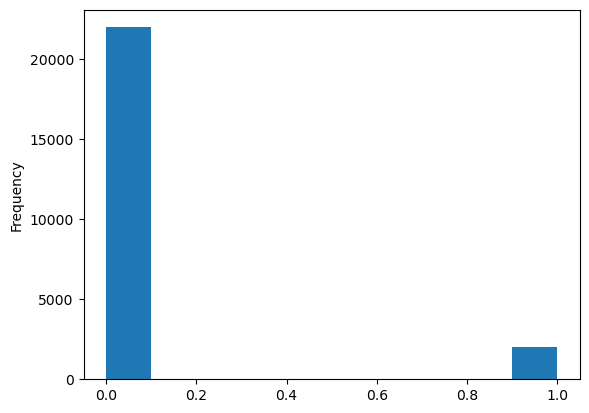

In [23]:
train_set["TARGET"].astype(int).plot.hist()

In [24]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [25]:
# Missing values statistics
print("Training set")
train_missing_values = missing_values_table(train_set)
print(train_missing_values.head(20))


Training set
Your selected dataframe has 35 columns.
There are 11 columns that have missing values.
                            Missing Values  % of Total Values
DAYS_REGISTRATION                     9733               40.6
FLAG_OWN_REALTY                       9571               39.9
CB_SCORE_2                            8274               34.5
AMT_CREDIT                            7300               30.4
REGION_POPULATION_RELATIVE            7149               29.8
DAYS_EMPLOYED                         7149               29.8
CB_SCORE_3                            7108               29.6
CODE_GENDER                           7094               29.6
CB_SCORE_1                            6146               25.6
DAYS_BIRTH                            4749               19.8
DAYS_ID_PUBLISH                       4741               19.8


In [26]:
# Number of each type of column
print(train_set.dtypes.value_counts())

int64      16
float64    10
object      9
dtype: int64


In [27]:
# Number of unique classes in each object column
train_set.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_REALTY                2
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [28]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train_set:
    if train_set[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_set[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_set[col])
            # Transform both training and testing data
            train_set[col] = le.transform(train_set[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [29]:
# one-hot encoding of categorical variables
train_set = pd.get_dummies(train_set)

print('Training Features shape: ', train_set.shape)

Training Features shape:  (24000, 121)


In [30]:
(train_set['DAYS_BIRTH'] / -365).describe()

count    19251.000000
mean        43.908294
std         11.959637
min         21.063014
25%         33.908219
50%         43.098630
75%         53.827397
max         69.032877
Name: DAYS_BIRTH, dtype: float64

In [31]:
train_set['DAYS_EMPLOYED'].describe()

count     16851.000000
mean      63041.865112
std      140634.051334
min      -16852.000000
25%       -2772.000000
50%       -1206.000000
75%        -299.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

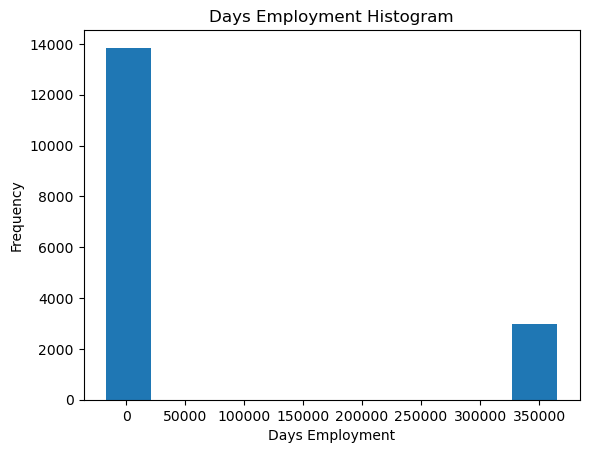

In [32]:
train_set['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [33]:
anom = train_set[train_set['DAYS_EMPLOYED'] == 365243]
non_anom = train_set[train_set['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.67% of loans
The anomalies default on 5.77% of loans
There are 2999 anomalous days of employment


Text(0.5, 0, 'Days Employment')

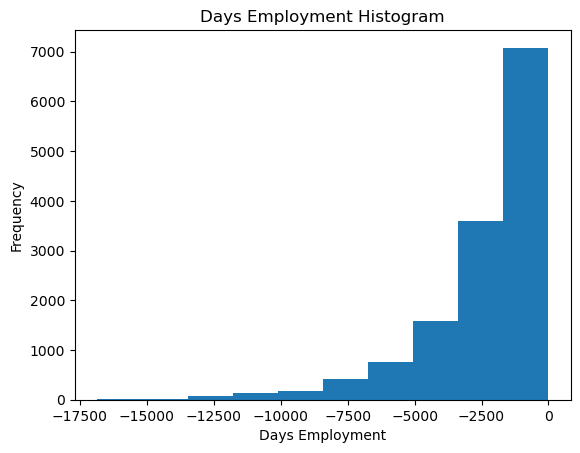

In [34]:
# Create an anomalous flag column
train_set['DAYS_EMPLOYED_ANOM'] = train_set["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train_set['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_set['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [35]:
train_set['DAYS_EMPLOYED_ANOM'] = train_set["DAYS_EMPLOYED"] == 365243
train_set["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (train_set["DAYS_EMPLOYED_ANOM"].sum(), len(train_set)))

There are 0 anomalies in the test data out of 24000 entries


In [36]:
# Find correlations with the target and sort
correlations = train_set.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_EMP_PHONE                                       0.040806
CODE_GENDER_M                                        0.044071
DAYS_ID_PUBLISH                                      0.044937
FLAG_DOCUMENT_3                                      0.047013
REG_CITY_NOT_LIVE_CITY                               0.047905
NAME_EDUCATION_TYPE_Secondary / secondary special    0.058204
REG_CITY_NOT_WORK_CITY                               0.062075
NAME_INCOME_TYPE_Working                             0.065369
REGION_RATING_CLIENT                                 0.065444
DAYS_EMPLOYED                                        0.076004
DAYS_BIRTH                                           0.084192
CB_SCORE_1                                           0.129019
TARGET                                               1.000000
FLAG_MOBIL                                                NaN
DAYS_EMPLOYED_ANOM                                        NaN
Name: TARGET, dtype: float64

Most Negati

In [37]:
# Find the correlation of the positive days since birth and target
train_set['DAYS_BIRTH'] = abs(train_set['DAYS_BIRTH'])
train_set['DAYS_BIRTH'].corr(train_set['TARGET'])

-0.08419249776786547

Text(0, 0.5, 'Count')

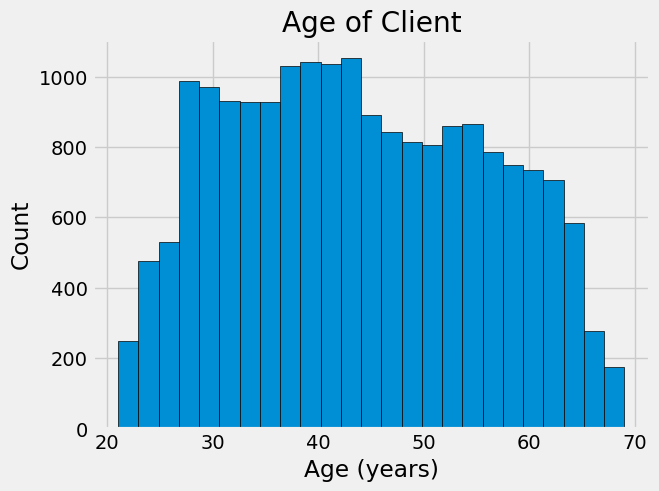

In [38]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train_set['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Ages')

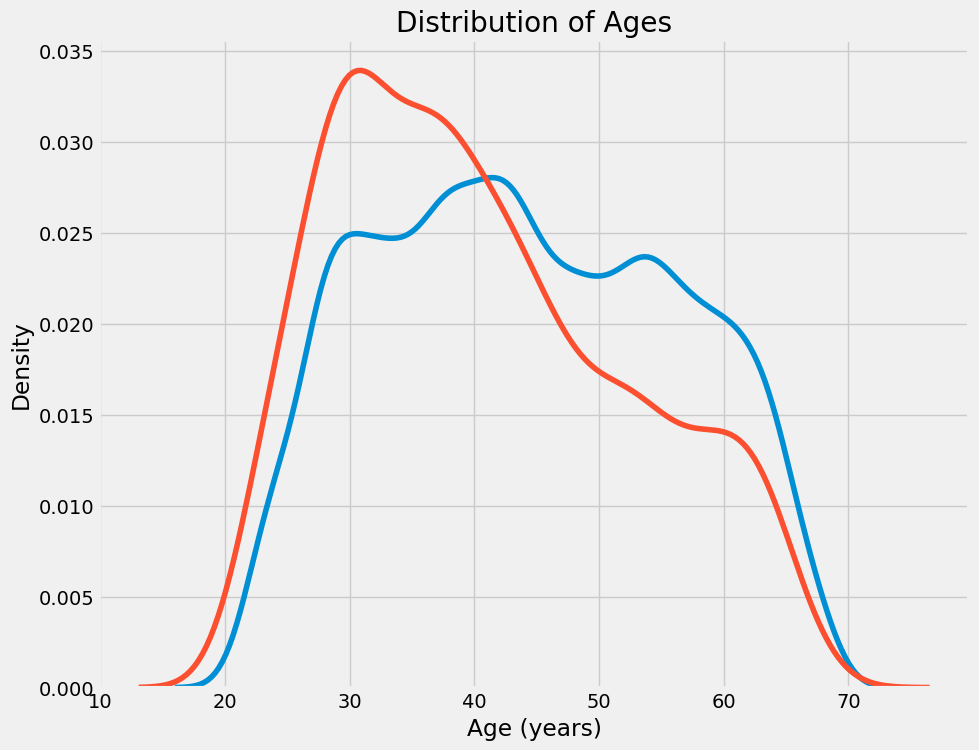

In [39]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_set.loc[train_set['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_set.loc[train_set['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

In [40]:
# Age information into a separate dataframe
age_data = train_set[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461.0,25.920548,"(25.0, 30.0]"
1,0,19046.0,52.180822,"(50.0, 55.0]"
2,0,12931.0,35.427397,"(35.0, 40.0]"
3,0,11286.0,30.920548,"(30.0, 35.0]"
4,0,NaN,NaN,NaN
5,0,18264.0,50.038356,"(50.0, 55.0]"
6,0,10473.0,28.693151,"(25.0, 30.0]"
7,0,15909.0,43.586301,"(40.0, 45.0]"
8,0,NaN,NaN,NaN
9,0,21613.0,59.213699,"(55.0, 60.0]"


In [41]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.133245,8544.154354,23.408642
"(25.0, 30.0]",0.114817,10157.919962,27.829918
"(30.0, 35.0]",0.108064,11839.474007,32.436915
"(35.0, 40.0]",0.102251,13695.980923,37.523235
"(40.0, 45.0]",0.079524,15497.929394,42.460081
"(45.0, 50.0]",0.068150,17330.175243,47.479932
"(50.0, 55.0]",0.060565,19191.041274,52.578195
"(55.0, 60.0]",0.054912,20975.508816,57.467147
"(60.0, 65.0]",0.067989,22766.956941,62.375224


Text(0.5, 1.0, 'Failure to Repay by Age Group')

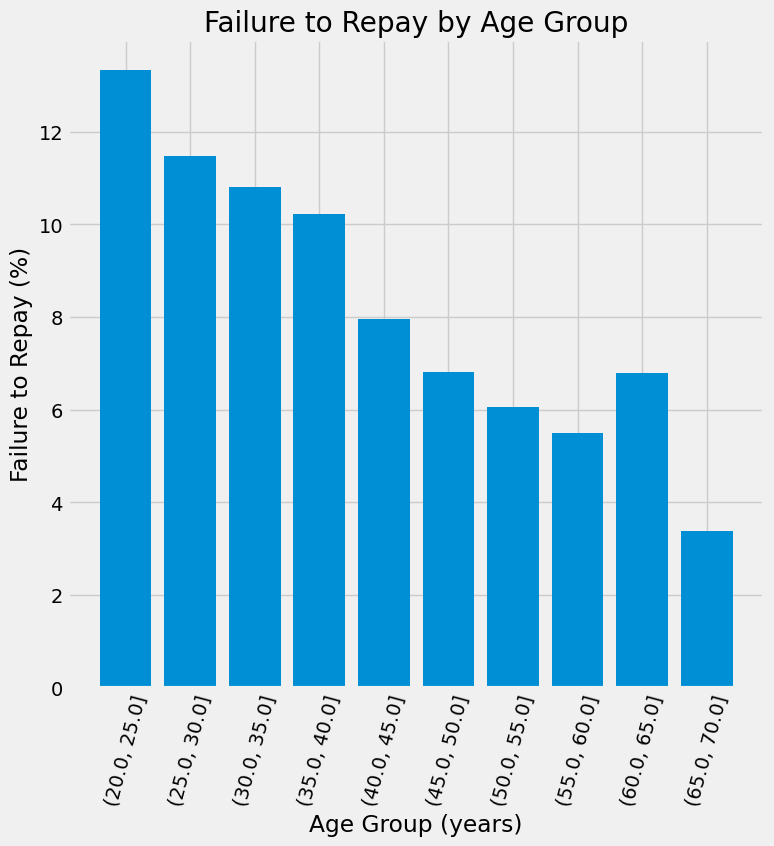

In [42]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

In [43]:
print(len(train_set.columns))
print(list(train_set.columns))

122
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'CODE_GENDER_F', 'CODE_GENDER_M', 'CODE_GENDER_XNA', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_E

In [44]:
# Feature engineering
app_train_domain = train_set.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

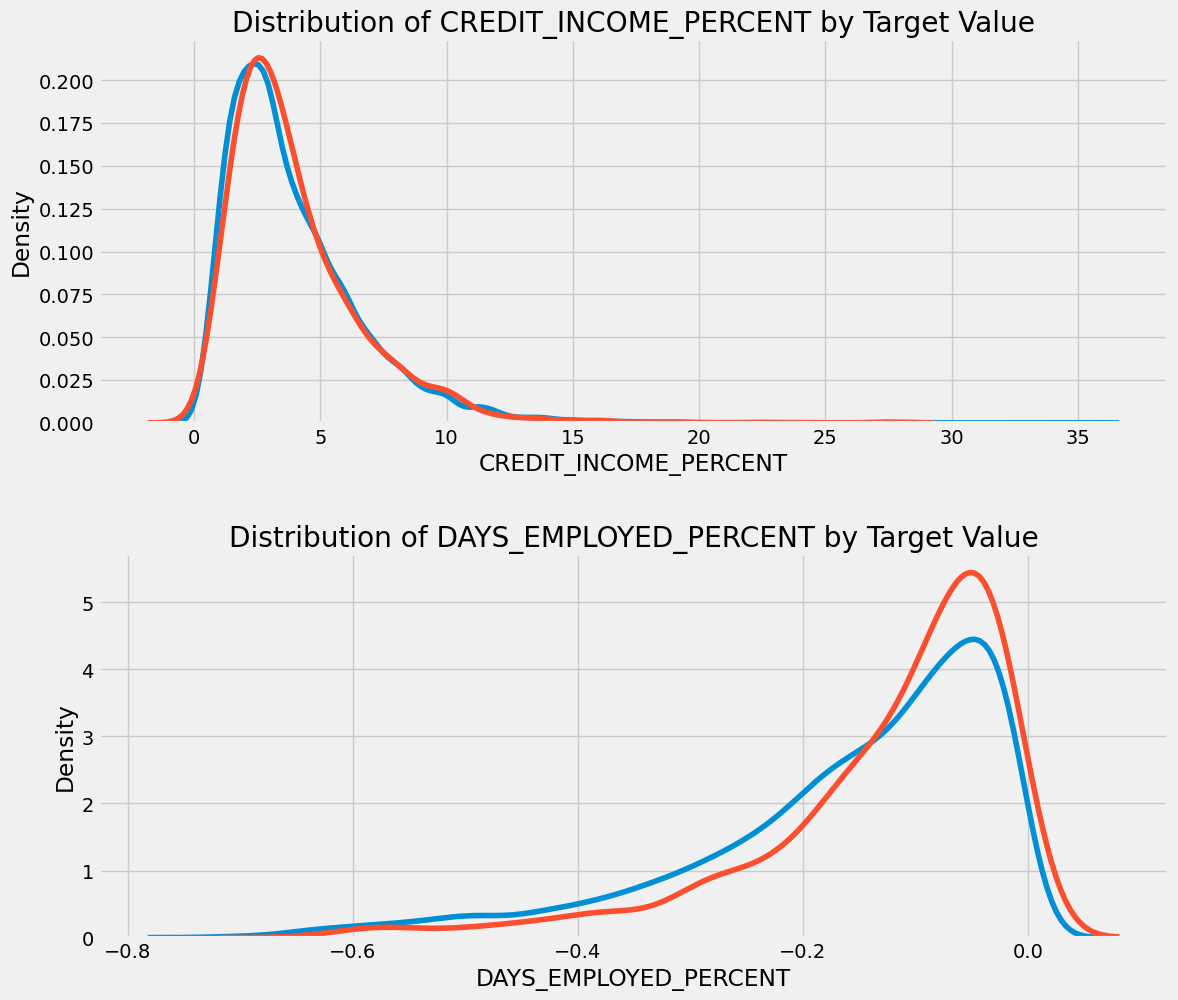

In [45]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT']):

    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density')

plt.tight_layout(h_pad = 2.5)

In [46]:
# Seprate dataframe
target_0_df = train_set[train_set["TARGET"] == 0]
target_1_df = train_set[train_set["TARGET"] == 1]

print(target_0_df.shape)
print(target_1_df.shape)

(22007, 122)
(1993, 122)


In [47]:
from sklearn.model_selection import train_test_split

# Split into test and train set
target_0_train, target_0_test = train_test_split(target_0_df, test_size = 0.2)
target_1_train, target_1_test = train_test_split(target_1_df, test_size = 0.2)

train_set = pd.concat([target_0_train, target_1_train])
test_set = pd.concat([target_0_test, target_1_test])

print(train_set.shape)
print(test_set.shape)

print("Train set: ", train_set["TARGET"].value_counts())
print("Test set: ", test_set["TARGET"].value_counts())

(19199, 122)
(4801, 122)
Train set:  0    17605
1     1594
Name: TARGET, dtype: int64
Test set:  0    4402
1     399
Name: TARGET, dtype: int64


In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

train_labels = train_set['TARGET']

# Drop the target from the training data
if 'TARGET' in train_set:
    train = train_set.drop(columns = ['TARGET'])
else:
    train = train_set.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test_lable = test_set["TARGET"]
test = test_set.drop(columns = ['TARGET'])

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (19199, 121)
Testing data shape:  (4801, 121)


In [49]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [50]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [51]:
# Submission dataframe
submit = test_set[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
7529,211679,0.079938
12820,290135,0.082586
1479,122592,0.081882
5680,184227,0.084306
12819,290131,0.079367


In [52]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

0    17605
1     1594
Name: TARGET, dtype: int64


<Axes: >

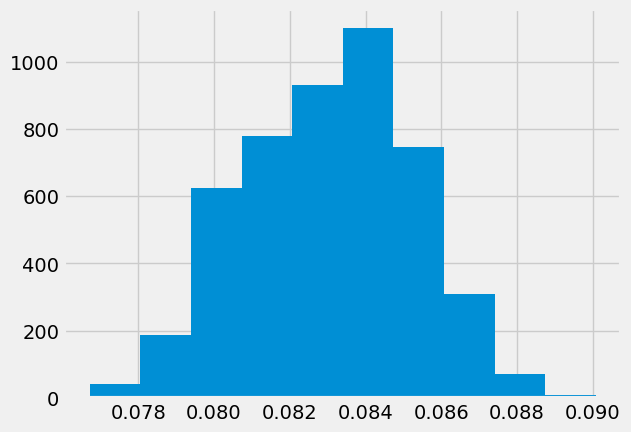

In [53]:
print(train_labels.value_counts())
submit['TARGET'].hist()

<Axes: >

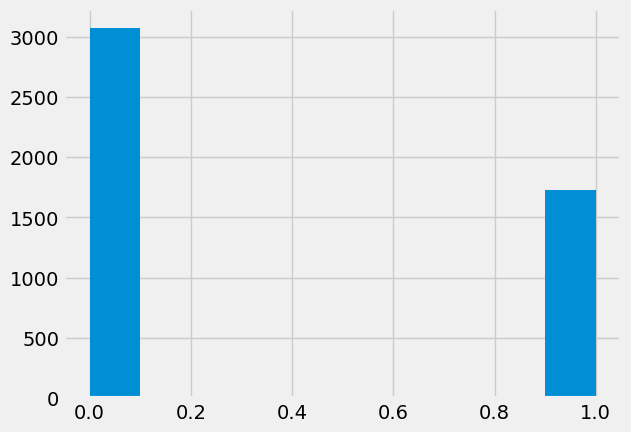

In [54]:
# Define threshold
log_reg_threshold = 0.084

submit['TARGET'][submit['TARGET'] > log_reg_threshold] = 1
submit['TARGET'][submit['TARGET'] <= log_reg_threshold] = 0

submit['TARGET'].hist()

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [56]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


In [57]:
# Make a submission dataframe
submit = test_set[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

In [58]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better.

    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance

    Returns:
        shows a plot of the 15 most importance features

        df (dataframe): feature importances sorted by importance (highest to lowest)
        with a column for normalized importance
        """

    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()

    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    return df

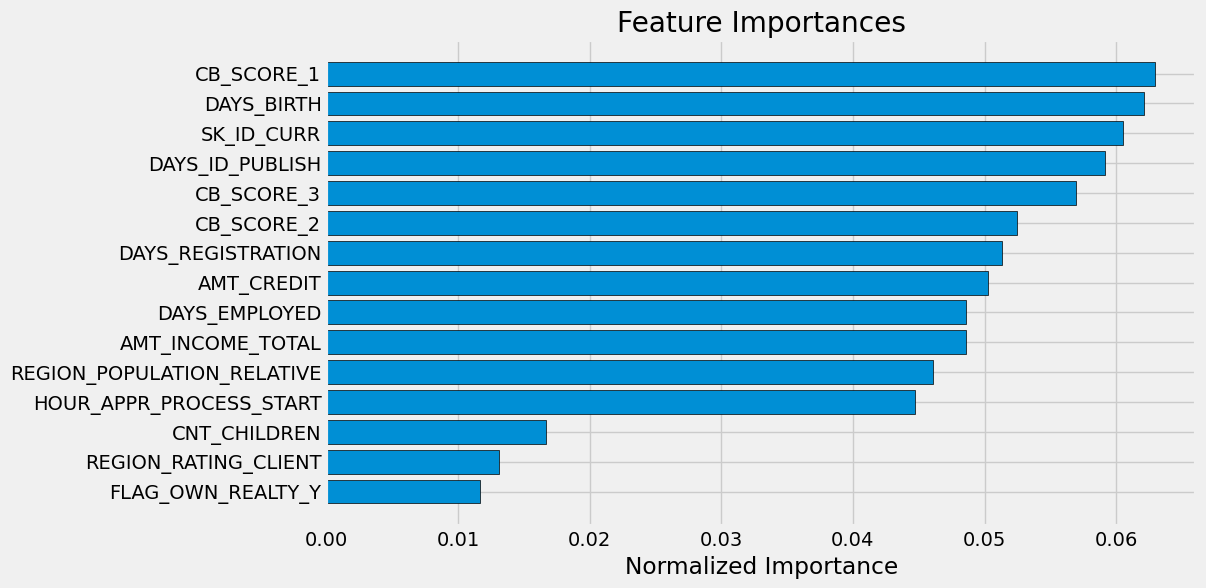

In [59]:
feature_importances_sorted = plot_feature_importances(feature_importances)


In [60]:
log_reg_threshold = 0.084

# Test function
def test(test_set):
    log_reg_pred = log_reg.predict_proba(test_set)[:, 1]

    submit['TARGET'] = log_reg_pred

    submit['TARGET'][submit['TARGET'] > log_reg_threshold] = 1
    submit['TARGET'][submit['TARGET'] <= log_reg_threshold] = 0

    submit.to_csv('results.csv', index = False)

In [61]:
# Post-processing function for testing
def post_processing(dataset: pd.DataFrame) -> np.ndarray:
    le = LabelEncoder()

    le_count = 0

    # Iterate through the columns
    for col in dataset:
        if dataset[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(dataset[col].unique())) <= 2:
                # Train on the training data
                le.fit(dataset[col])
                # Transform both training and testing data
                dataset[col] = le.transform(dataset[col])

                # Keep track of how many columns were label encoded
                le_count += 1

    dataset = pd.get_dummies(dataset)

    # Create an anomalous flag column
    dataset['DAYS_EMPLOYED_ANOM'] = dataset["DAYS_EMPLOYED"] == 365243

    # Replace the anomalous values with nan
    dataset['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

    dataset['DAYS_EMPLOYED_ANOM'] = dataset["DAYS_EMPLOYED"] == 365243
    dataset["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

    dataset['DAYS_BIRTH'] = abs(dataset['DAYS_BIRTH'])

    # Median imputation of missing values
    imputer = SimpleImputer(strategy = 'median')

    # Scale each feature to 0-1
    scaler = MinMaxScaler(feature_range = (0, 1))

    # Fit on the training data
    imputer.fit(dataset)

    # Transform both training and testing data
    dataset = imputer.transform(dataset)

    # Repeat with the scaler
    scaler.fit(dataset)
    dataset = scaler.transform(dataset)

    return dataset


In [62]:
droped = test_set.drop(columns = ['TARGET'])
proccessd = post_processing(droped)

test(proccessd)